# CJK solution for seaborn, matplotlib and dtreeviz

In [ ]:
!fc-list :lang=zh

## Restore the `.rcParams` from Matplotlib's internal default style. 

In [ ]:
from matplotlib import pyplot as plt
plt.rcdefaults()

## Find the default font of matplotlib Permalink

In [ ]:
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family()))

## Remove the cache of matplotlibPermalink


In [ ]:
rm -rf ~/.matplotlib

## Copy your font file into matplotlib

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Arial%20Unicode.ttf
!cp Arial%20Unicode.ttf /Users/steven/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/

In [ ]:
!wget https://github.com/googlefonts/noto-cjk/raw/main/Serif/NotoSerifCJK-Regular.ttc

In [ ]:
!cp NotoSerifCJK-Regular.ttc /Users/steven/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/

## restart current notebook

In [ ]:
ls /Users/steven/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSerifCJK-Regular.ttc

In [ ]:
from  matplotlib.font_manager  import fontManager
[(f.name,f.fname) for f in fontManager.ttflist  if f.name.find('Arial Unicode')>=0 or f.name.find('CJK')>=0]

In [ ]:
for f in fontManager.ttflist:
    if f.fname.endswith('NotoSerifCJK-Regular.ttc'):
        print(f.fname,f.name)

In [ ]:
from matplotlib import pyplot as plt
plt.rcdefaults()
print(plt.rcParams['font.sans-serif'])

In [ ]:
# default_font="Noto Serif CJK JP"
default_font="Arial Unicode MS"

##  dtreeviz

1. need modify version [dtreeviz](https://github.com/alitrack/dtreeviz)

2. run this following code first

In [ ]:
default_font="Arial Unicode MS" 
from matplotlib import pyplot as plt
plt.rcdefaults()
plt.rcParams['font.sans-serif']=[default_font]+plt.rcParams['font.sans-serif']
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

3. call dtreeviz 

In [ ]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

classifier = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)
# the following two line codes are just for Chinese test.
feature_names = ['萼片sepal length (cm)','萼片sepal width (cm)',
                 '花瓣petal length (cm)','花瓣petal width (cm)']
class_names = ["山鸢尾 (Iris-setosa)", "变色鸢尾(Iris-versicolor)", "维吉尼亚鸢尾(Iris-virginica)"]
viz = dtreeviz(classifier,
               iris.data,
               iris.target,
               target_name='variety',
               feature_names=feature_names,
               class_names=  class_names # need class_names for classifier
              )

viz

## seaborn

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcdefaults()
print("default:",plt.rcParams['font.sans-serif'][0])
plt.rcParams['font.sans-serif']=["Arial Unicode MS"]+plt.rcParams['font.sans-serif']
print("modified by me:",plt.rcParams['font.sans-serif'][0])
sns.set_style('darkgrid')
print("modified by sns:",plt.rcParams['font.sans-serif'][0])
sns.set_style('darkgrid',{"font.sans-serif":[default_font]})
print("modified by sns:",plt.rcParams['font.sans-serif'][0])

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcdefaults()
default_font="Arial Unicode MS"
iris = sns.load_dataset('iris')

iris.columns=['萼片sepal_length', '萼片sepal_width'
              ,'花瓣petal_length', '花瓣petal_width','species']
iris.replace(["setosa","versicolor","virginica"], 
           ["山鸢尾 (부채붓꽃)", "变色鸢尾(ブル-フラッグ)", "维吉尼亚鸢尾(Iris-virginica)"], 
           inplace=True)
# style used as a theme of graph for example 
# if we want black graph with grid then write "darkgrid"
sns.set_style("whitegrid",{"font.sans-serif":[default_font]}) 
sns.pairplot(iris, hue="species")

In [ ]:
sns.set_style("darkgrid") 
plt.rcParams['font.sans-serif']=[default_font]+plt.rcParams['font.sans-serif']
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box
sns.pairplot(iris, hue="species")

## using font without install(不用安装也可以用）

In [1]:
from matplotlib import pyplot as plt,font_manager as fm
from pathlib import Path
import os
#Restore the `.rcParams` from Matplotlib's internal default style.
plt.rcdefaults()

path = Path(os.getcwd())
fname=os.path.join(path.parent.absolute(),'data','NotoSerifCJK-Regular.ttc')
fontProperties=fm.FontProperties(fname=fname,size=14)
default_font=fontProperties.get_name()# "Arial Unicode MS"
if default_font not in [f.name for f in fm.fontManager.ttflist]:
    print(f"{default_font} does not exist, let's add it to fontManager" )

if fname not in [f.fname for f in fm.fontManager.ttflist]:
    fm.fontManager.addfont(fname) # need absolute path

plt.rcParams['font.sans-serif']=[default_font]+plt.rcParams['font.sans-serif']
plt.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

Noto Serif CJK JP does not exist, let's add it to fontManager


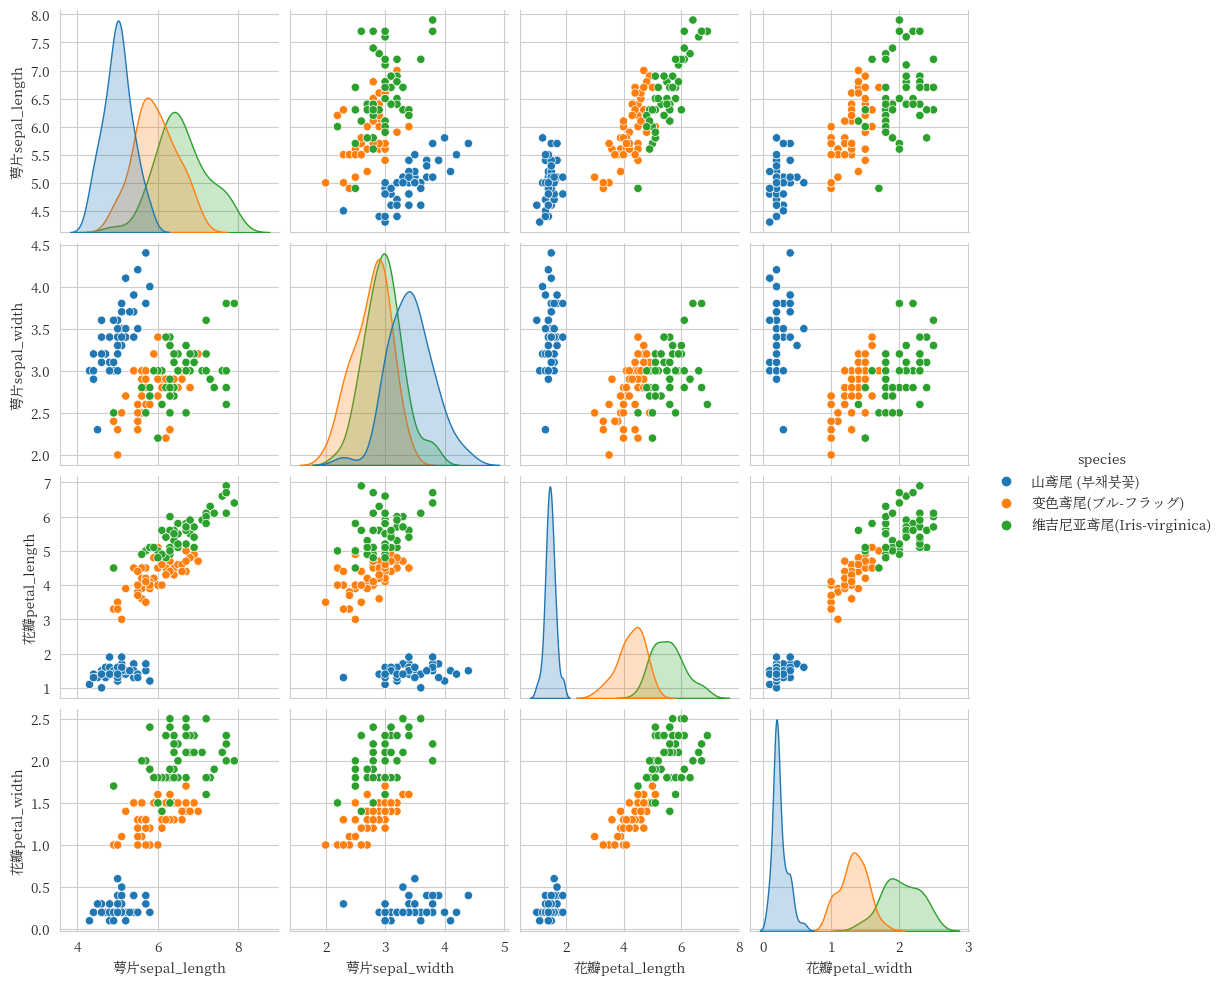

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcdefaults()
iris = sns.load_dataset('iris')

iris.columns=['萼片sepal_length', '萼片sepal_width'
              ,'花瓣petal_length', '花瓣petal_width','species']
iris.replace(["setosa","versicolor","virginica"], 
           ["山鸢尾 (부채붓꽃)", "变色鸢尾(ブル-フラッグ)", "维吉尼亚鸢尾(Iris-virginica)"], 
           inplace=True)
# style used as a theme of graph for example 
# if we want black graph with grid then write "darkgrid"
sns.set_style("whitegrid",{"font.sans-serif":[default_font]}) 
sns.pairplot(iris, hue="species")